<a href="https://colab.research.google.com/github/gitSean23/LandSatClassification/blob/main/CNN_EuroSat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

In [ ]:
!pip install -q tensorflow-datasets tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

# Load and Organize Data

In [ ]:
(ds_train, ds_info) = tfds.load('eurosat', split=['train'], shuffle_files=True, as_supervised=True, with_info=True)
class_names = ['Highway', 'Pasture', 'Residential', 'HerbaceousVegetation', 'PermanentCrop', 'SeaLake', 'River', 'Forest']
layers.InputSpec(dtype=tf.float32)

train_imgs = []
train_labels = []

for i, j in tfds.as_numpy(ds_train):
  #print(type(i), type(j))
  train_imgs.append(i)
  train_labels.append(j)

print(train_imgs[:5])

[array([[[254, 254, 254],
        [253, 253, 253],
        [254, 254, 254],
        ...,
        [252, 252, 252],
        [250, 250, 250],
        [250, 250, 250]],

       [[253, 253, 253],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [250, 250, 250]],

       [[254, 254, 254],
        [253, 253, 253],
        [254, 254, 254],
        ...,
        [252, 252, 252],
        [250, 250, 250],
        [251, 251, 251]],

       ...,

       [[253, 253, 253],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [249, 249, 249],
        [249, 249, 249],
        [250, 250, 250]],

       [[252, 252, 252],
        [252, 252, 252],
        [251, 251, 251],
        ...,
        [248, 248, 248],
        [248, 248, 248],
        [249, 249, 249]],

       [[251, 251, 251],
        [252, 252, 252],
        [253, 253, 253],
        ...,
        [248, 248, 248],
        [249, 249, 249],
        [250, 250, 250]

# Train Pipline

In [ ]:
def normalize_img(image, label):
  #Turns the imgs from uint8 values to pixel float32 values
  return tf.cast(image, tf.float32) / 255., label

tf_train = tf_train.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
tf_train = tf_train.cache()
tf_train = tf_train.shuffle(tf_info.splits['train'].num_examples)
tf_train = tf_train.batch(32)
tf_train = tf_train.prefetch(tf.data.experimental.AUTOTUNE)
print(tf_train)

<PrefetchDataset shapes: ((None, 300, 300, 3), (None,)), types: (tf.float32, tf.int64)>


# Test Pipline

In [ ]:
tf_test = tf_test.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
tf_test = tf_test.batch(32)
tf_test = tf_test.cache()
tf_test = tf_test.prefetch(tf.data.experimental.AUTOTUNE)

# Convolutional Neural Network Architecture

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (5,5), activation='relu', input_shape=(300,300,3)))
model.add(layers.MaxPooling2D(3,3))
model.add(layers.Conv2D(64, (5,5), activation='relu'))
model.add(layers.MaxPooling2D(3,3))
model.add(layers.Conv2D(64, (5,5), activation='relu'))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(3)) #3 Classes

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 296, 296, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 94, 94, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 64)        102464    
_________________________________________________________________
flatten (Flatten)            (None, 46656)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                1

# Training

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(tf_train, epochs=4, validation_data=tf_test)


Epoch 1/4
79/79 [==============================] - 396s 5s/step - loss: 0.9812 - accuracy: 0.5210 - val_loss: 0.6569 - val_accuracy: 0.6989
Epoch 2/4
79/79 [==============================] - 384s 5s/step - loss: 0.1713 - accuracy: 0.9381 - val_loss: 0.6947 - val_accuracy: 0.7419
Epoch 3/4
79/79 [==============================] - 384s 5s/step - loss: 0.0233 - accuracy: 0.9952 - val_loss: 0.8862 - val_accuracy: 0.8118
Epoch 4/4
79/79 [==============================] - 382s 5s/step - loss: 0.0075 - accuracy: 0.9980 - val_loss: 0.8852 - val_accuracy: 0.8038


# Testing

In [ ]:
loss, acc = model.evaluate(tf_test, verbose=2)
print('Test accuracy:', acc)

12/12 - 14s - loss: 0.8852 - accuracy: 0.8038
Test accuracy: 0.8037634491920471


# Saving

In [ ]:
model.save("rpsModel.h5")
rpsModel = models.load_model('rpsModel.h5')

# Prediction

Predicted: scissors
Expected: scissors


TypeError: ignored

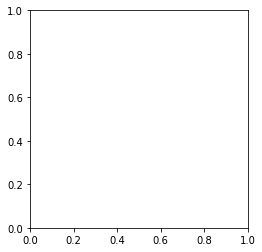

In [ ]:
predictUrl = 'https://scienceillustrated.com.au/blog/wp-content/uploads/2012/05/lizardspock.gif' #Ignore some of this code here
predictPath = tf.keras.utils.get_file('RockPS', origin=predictUrl)
img = tf.keras.preprocessing.image.load_img(predictPath, target_size=(300,300))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0)

target = 15 #This code is more important
prediction = model.predict(img_array)
print('Predicted:',class_names[np.argmax(prediction)])
print("Expected:", class_names[test_labels[target]])
plt.figure()
plt.imshow('https://scienceillustrated.com.au/blog/wp-content/uploads/2012/05/lizardspock.gif')
plt.show()